# Análise de Produção Científica do Centro de Informática da UFPB
**GRUPO:** Clarice Lopes, Felipe Medeiros, Vinícius Mangueira

## Introdução

Este trabalho tem como objetivo analisar a produção científica do Centro de Informática da Universidade Federal da Paraíba (UFPB) ao longo dos anos, a partir da coleta de dados de artigos científicos publicados por seus professores.

A motivação principal é entender padrões de publicação, áreas temáticas mais recorrentes e redes de colaboração entre autores, aplicando métodos estatísticos como regressão linear e visualizações como nuvem de palavras.

As perguntas norteadoras da análise são:
- Quais são as áreas de conhecimento mais frequentes nas publicações do Centro de Informática?
- A produção no Centro de Informática cresceu ou diminuiu ao longo dos anos?
- Os pesquisadores tendem a colaborar em pequenos grupos fechados ou redes mais amplas?

## Dados usados

Os dados foram extraídos de coletas automáticas a partir do Google Acadêmico, referentes a artigos de professores do Centro de Informática da UFPB.

- Cada arquivo CSV representa um grupo de professor, contendo informações como título do artigo, autores, data de publicação, conferência, editora, entre outras infomações.
- Além disso, foi gerado mais alguns arquivos CSV com dados específicos já minerados. 

### Exploração inicial dos dados

- Total de artigos coletados: 2501
- Professores com trabalhos publicados: 33/66
- Intervalo de anos das publicações: 1984-2025

## Pré-processamento

### Passos realizados:

- **Extração de Títulos:** Utilizando os CSVs brutos, foram coletadas grupos pequenos de informações como os CSVs artigos_*_*.csv com nome dos professores e títulos dos seus artigos.
- **Extrações Gerais:** Foram coletadas infomações mais gerais que estão guardadas no arquivo analise.txt e é resultado do script analises.py
- **Organização dos dados:** Dados salvos em novos arquivos CSV para facilitar a análise posterior.

Todas essas etapas foram feitas para garantir que as informações pudessem ser usadas diretamente nas análises gráficas.

# Pergunta 1: Quais são as áreas de conhecimento mais frequentes nas publicações?

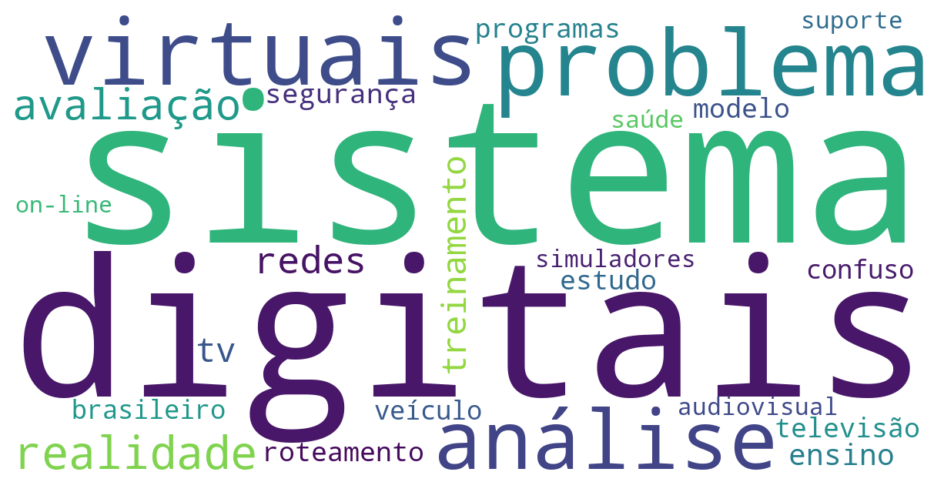

In [11]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open('captura_dados/palavras_chave.csv', encoding='utf-8') as f:
    linhas = f.readlines()

linhas = linhas[1:]

palavras = []
frequencias = []

for linha in linhas:
    if ';' in linha:
        palavra, freq = linha.strip().split(';')
        palavras.append(palavra.strip())
        frequencias.append(int(freq.strip()))

frequencias_dict = dict(zip(palavras, frequencias))

wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      colormap='viridis').generate_from_frequencies(frequencias_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gráfico de Barras

Após essa visualização previa das palavras mais utilizada nos títulos dos artigos, segue um gráfico de barras que permite uma melhor apresentação dos valores encontrados.

### Passos realizados:
- **Contagem de palavras-chave:** As palavras dos títulos dos artigos foram processadas, removendo palavras comuns e contabilizando as mais frequentes. (palavras_chave.py)
- **Gráfico:** Construção de um gráfico de barras simples. (grafico_palavras.py)

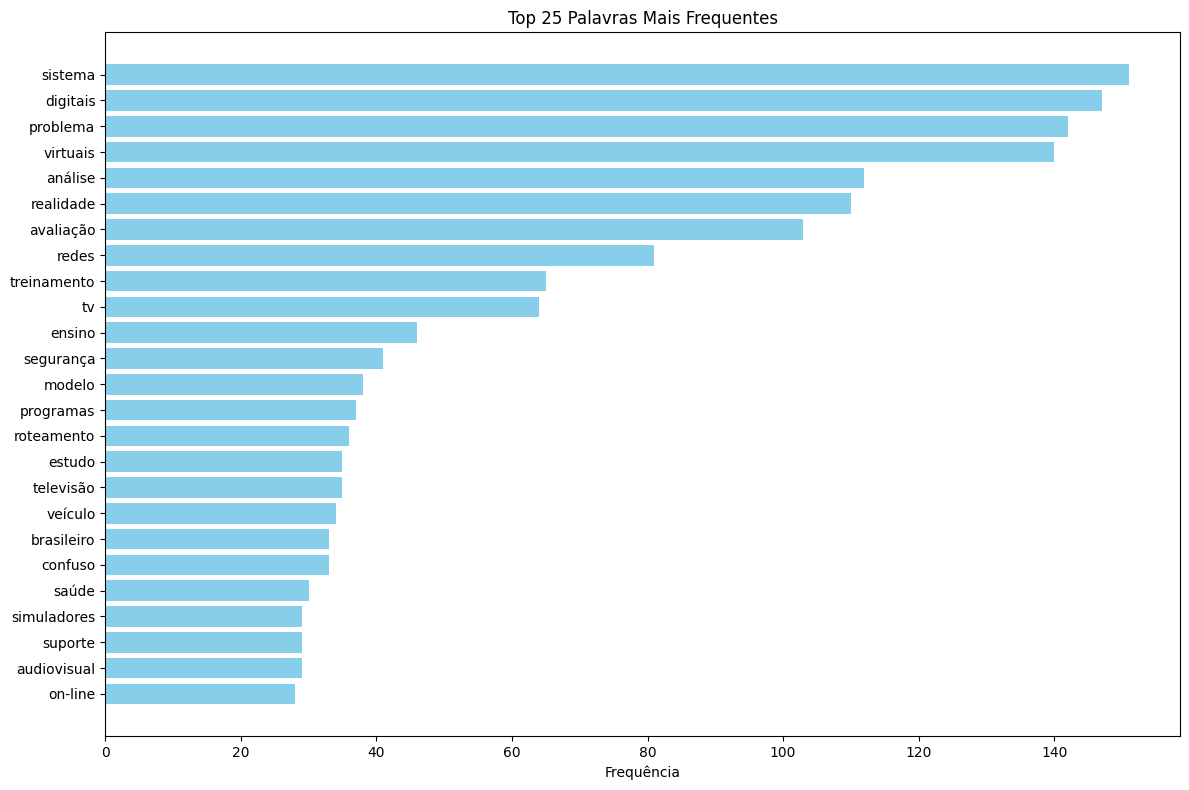

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('captura_dados/palavras.csv', sep=';', header=None, names=['palavra', 'frequencia'], encoding='utf-8')

df['palavra'] = df['palavra'].str.strip().str.lower()
df['frequencia'] = df['frequencia'].astype(int)

df_agrupado = df.groupby('palavra', as_index=False)['frequencia'].sum()

top_25 = df_agrupado.sort_values(by='frequencia', ascending=False).head(25)

plt.figure(figsize=(12, 8))
plt.barh(top_25['palavra'][::-1], top_25['frequencia'][::-1], color='skyblue')
plt.xlabel('Frequência')
plt.title('Top 25 Palavras Mais Frequentes')
plt.tight_layout()
plt.show()

## Análise dos Temas Abordados nas Publicações

A partir da nuvem de palavras construída com base nos títulos dos artigos coletados, foi possível identificar os temas mais recorrentes nas publicações do Centro de Informática da UFPB.  
As palavras mais frequentes foram **"sistema"**, **"digitais"**, **"problema"**, **"virtuais"**, **"análise"**, **"realidade"**, **"avaliação"**, **"redes"** e **"treinamento"**.

Essas palavras foram agrupadas para melhor interpretação dos temas abordados:

### Tecnologias Digitais e Realidade Virtual
A alta frequência das palavras **"digitais"**, **"realidade"**, **"virtuais"**, **"tv"**, **"televisão"** e **"audiovisual"** indica uma forte atuação em pesquisas envolvendo novas tecnologias digitais, realidade virtual e aplicações audiovisuais.

**Exemplos:**
- DERZU OMAIA - *TVGrid: computação em grid utilizando recursos de uma rede de TV digital*
- IGUATEMI EDUARDO DA FONSECA - *Ambiente computacional baseado em realidade virtual e interação natural para Treinamento no Setor Elétrico*

---

### Desenvolvimento de Sistemas Computacionais e Análise de Problemas
Termos como **"sistema"**, **"problema"**, **"análise"**, **"avaliação"** e **"suporte"** mostram que o desenvolvimento, avaliação e suporte de sistemas computacionais são áreas centrais de interesse.

**Exemplo:**
- ALISSON VASCONCELOS DE BRITO - *Análise de Relevância de Publicações em Sistemas Embarcados através de Análise da Rede de Termos e Citações*

---

### Redes de Comunicação e Roteamento
As palavras **"redes"** e **"roteamento"** apontam para a presença de pesquisas envolvendo infraestrutura de redes e protocolos de comunicação.

**Exemplo:**
- ANAND SUBRAMANIAN - *Multi-Priority Alternative Journey and Routing Protocol: um Algoritmo para Roteamento em Redes Tolerantes a Atrasos e Desconexões Previsíveis*

---

### Educação e Treinamento Baseados em Tecnologia
A presença das palavras **"ensino"**, **"treinamento"** e **"simuladores"** revela um foco em aplicações tecnológicas para educação e capacitação.

**Exemplos:**
- YUSKA PAOLA COSTA AGUIAR - *Impacto do apoio metodológico e ferramental a aspectos de usabilidade no ensino prático da engenharia de software*
- YURI MALHEIROS - *O ensino integrado de gestão de qualidade de software e engenharia de software aplicada como modelo de educação interdisciplinar: Um relato de experiência no ensino de graduação*

---

### Aplicações em Saúde e Contexto Social
Palavras como **"saúde"** e **"brasileiro"** indicam o desenvolvimento de soluções voltadas para a área médica e para realidades sociais específicas do Brasil.

**Exemplo:**
- NATASHA CORREIA QUEIROZ LINO - *Um Estudo sobre a Contribuição de Ontologias para a Educação suportada por Tecnologias da Informação no Domínio da Saúde*

---

### Conclusão:
Esses agrupamentos sugerem que o Centro de Informática da UFPB tem uma forte tradição de pesquisa aplicada, voltada tanto para o avanço tecnológico quanto para o impacto social e educacional.

# Pergunta 2: A produção do Centro de Informática cresceu ou diminuiu ao longo dos anos?

## Gráfico de Barras

Para uma contextualização antecipada segue um gráfico de barras com dados que correspondem a quantidade de artigos publicados no respectivo ano analisado. 

### Passos realizados:
- **Extração de datas:** A partir da linha contendo "Data de Publicação", foram extraídas as datas associadas aos artigos. (datas_publicacao.csv)
- **Tratamento das datas:** Padronização das datas para capturar apenas o ano, mesmo quando a data vinha incompleta (ex: apenas ano, ou mês/ano). (anos_publicacao.csv)
- **Gráfico:** Construção de um gráfico de barras simples. (grafico_anos.py)
- **Regrssão Linear:** Aplicando regressão linear para análise mais concreta. (regressao_linear.py)


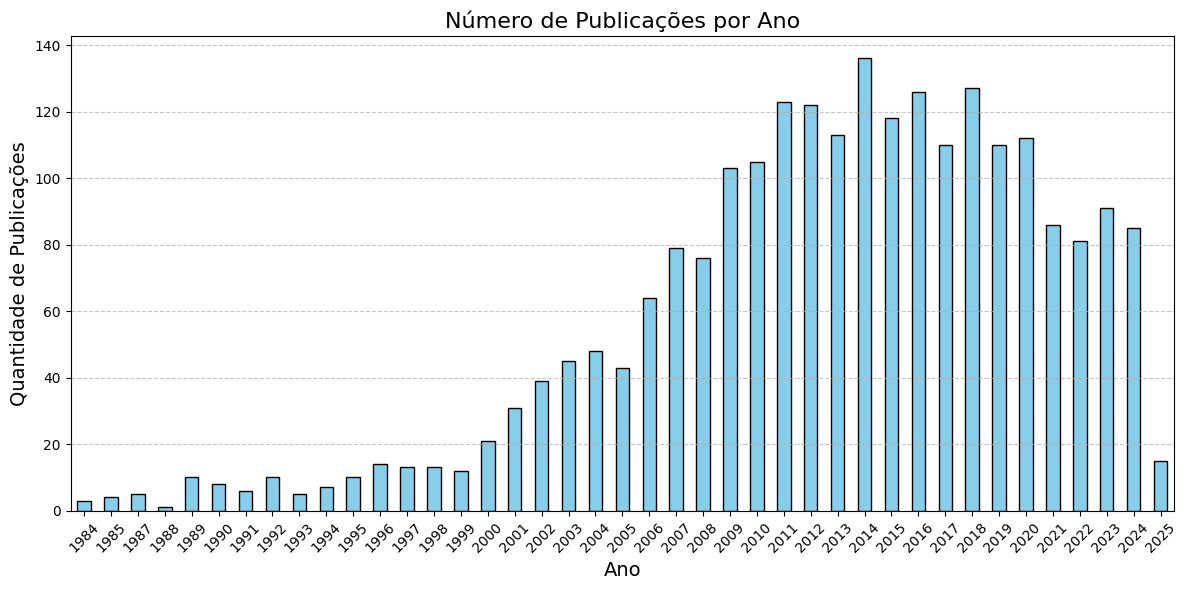

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('captura_dados/anos_publicacao.csv')

contagem_anos = df['Ano'].value_counts().sort_index()

plt.figure(figsize=(12,6))
contagem_anos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Publicações por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Publicações', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Regressão Linear 

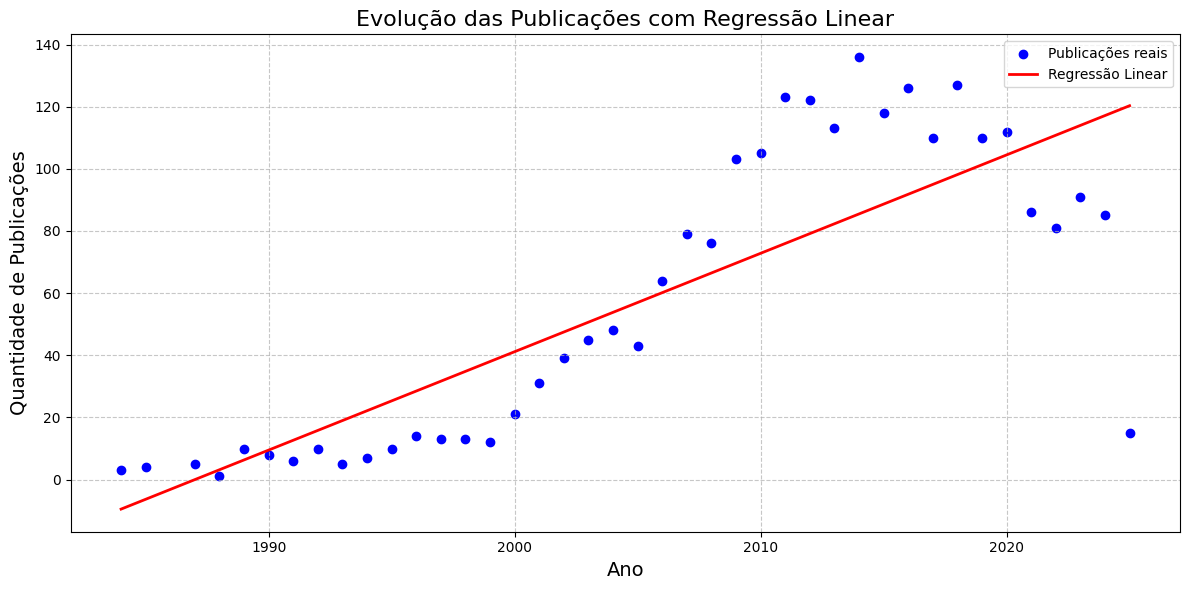

Coeficiente Angular (inclinação): 3.17
Coeficiente Linear (intercepto): -6290.79


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('captura_dados/anos_publicacao.csv')

contagem_anos = df['Ano'].value_counts().sort_index()

X = contagem_anos.index.values.reshape(-1, 1)
y = contagem_anos.values 

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Publicações reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.title('Evolução das Publicações com Regressão Linear', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Quantidade de Publicações', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Coeficiente Angular (inclinação): {modelo.coef_[0]:.2f}")
print(f"Coeficiente Linear (intercepto): {modelo.intercept_:.2f}")

## Análise da Evolução da Produção Científica
Para entender a evolução da produção científica do Centro de Informática da UFPB, aplicamos uma regressão linear simples, 
utilizando o ano de publicação como variável independente e o número de artigos como variável dependente.

### A regressão resultou nos seguintes coeficientes:
Coeficiente angular (inclinação): 3,17
Coeficiente linear (intercepto): -6290,79

### Interpretação da regressão:
O coeficiente angular positivo indica uma tendência geral de crescimento ao longo dos anos: em média, a cada ano, a produção científica 
aumenta em aproximadamente 3 artigos. Isso sugere que, no longo prazo, o Centro de Informática tem se tornado mais produtivo em termos de publicações científicas.

### Análise mais profunda dos dados reais:
Embora a tendência seja de crescimento, observamos variações importantes nos dados reais:
2014 foi um ano de alta produção, com cerca de 136 artigos publicados
Em 2020, a produção caiu para 113 artigos.
De 2021 em diante, a produção estabilizou em torno de 80 artigos por ano.

### Essas flutuações podem ser explicadas por fatores externos que a regressão linear não capta, como:
Mudanças na quantidade de professores e alunos no centro;
Impacto de eventos globais, como a pandemia de COVID-19 em 2020–2021, que afetou a produção científica em muitas instituições.

### Conclusão:
Apesar das quedas em anos recentes, a tendência histórica ainda é de crescimento, mas análises locais mostram que a produção científica 
do Centro de Informática passou por fases de crescimento, queda e estabilização, sugerindo a necessidade de uma análise contínua e atenta a fatores externos.

# Perguntsa 3: Os pesquisadores tendem a colaborar em pequenos grupos fechados ou redes mais amplas?

### Passos realizados:
- **Preparação de dados:** Foi realizada a manipulação do campo 'Autores' no arquivo 'autores_todos.csv' para gerar pares de colaboradores que já aturam juntos.
- **Manipulação:** Com esses pares montados fizemos um grafo para melhor realizar alguns tipos de medidas de centralidade.
- **Gráfico:** Geramos um gráfico de 'links' com o Top 30 autores. Essa abordagem de limite de autores foi adotada devido ao alto número de interações do grafo, que quando passadas para o gráfico impossibilitou a leitura clara das informações.  

In [17]:
%run captura_dados/link.py

   Artigo                                            Autores
0  Artigo                                            Autores
1       1                    GG Doronin; NA Larkin; AJ Souza
2       2  Arthur V Azevedo; Aparecido J de Souza; Freder...
3       3                                         A de Souza
4       4  Anna Ghazaryan; Yuri Latushkin; Stephen Schect...
   Artigo                                          Coautores
0  Artigo                                                 []
1       1  [(GG Doronin, NA Larkin), (AJ Souza, GG Doroni...
2       2  [(Aparecido J de Souza, Arthur V Azevedo), (Ar...
3       3                                                 []
4       4  [(Anna Ghazaryan, Yuri Latushkin), (Anna Ghaza...
[('GG Doronin', 'NA Larkin'), ('GG Doronin', 'AJ Souza'), ('GG Doronin', 'AJ De Souza'), ('NA Larkin', 'AJ Souza'), ('NA Larkin', 'AJ De Souza'), ('AJ Souza', 'G Chapiro'), ('AJ Souza', 'AA Mailybaev'), ('AJ Souza', 'D Marchesin'), ('AJ Souza', 'JC Mota'), ('AJ Souza'

In [21]:
%run captura_dados/analise_autores.py


Top 10 - Centralidade Grau:
Alisson Brito: 0.0777
Liliane S Machado: 0.0596
Ruy Alberto Corrêa Altafim: 0.0561
Vivek Nigam: 0.0485
Anand Subramanian: 0.0410
Alberto Raposo: 0.0394
Jauvane Oliveira: 0.0378
Guido Lemos de Souza Filho: 0.0368
Eduardo Albuquerque: 0.0341
Claudio Pinhanez: 0.0311

Top 10 - Centralidade Betweenness:
Alisson Brito: 0.1833
Guido Lemos de Souza Filho: 0.1076
Anand Subramanian: 0.1069
Vivek Nigam: 0.1063
Lucídio dos Anjos Formiga Cabral: 0.0863
Liliane S Machado: 0.0858
Ruy Alberto Corrêa Altafim: 0.0838
Raoni Kulesza: 0.0742
Antonio Carlos Cavalcanti: 0.0696
Iguatemi E Fonseca: 0.0510

Top 10 - Centralidade Closeness:
Alisson Brito: 0.2770
Guido Lemos de Souza Filho: 0.2745
Raoni Kulesza: 0.2594
Lucídio dos Anjos Formiga Cabral: 0.2568
Alexandre Nóbrega Duarte: 0.2552
Tiago Maritan Ugulino de Araújo: 0.2552
Anand Subramanian: 0.2549
Tatiana Aires Tavares: 0.2495
Vivek Nigam: 0.2437
Derzu Omaia: 0.2420

Top 10 - Centralidade Eigenvector:
Alberto Raposo: 0.1439


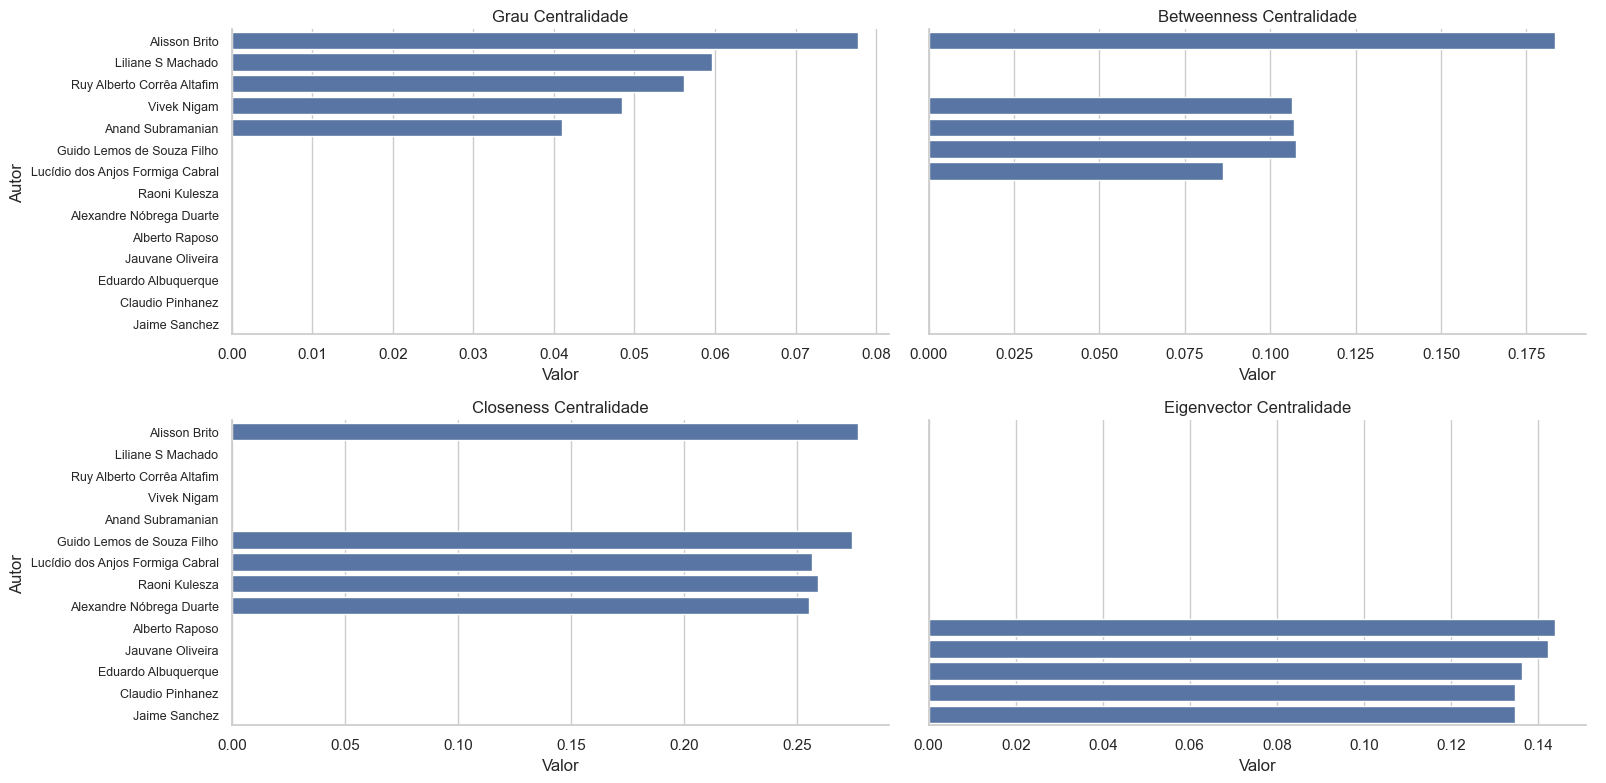

In [2]:
%run captura_dados/5_autores.py

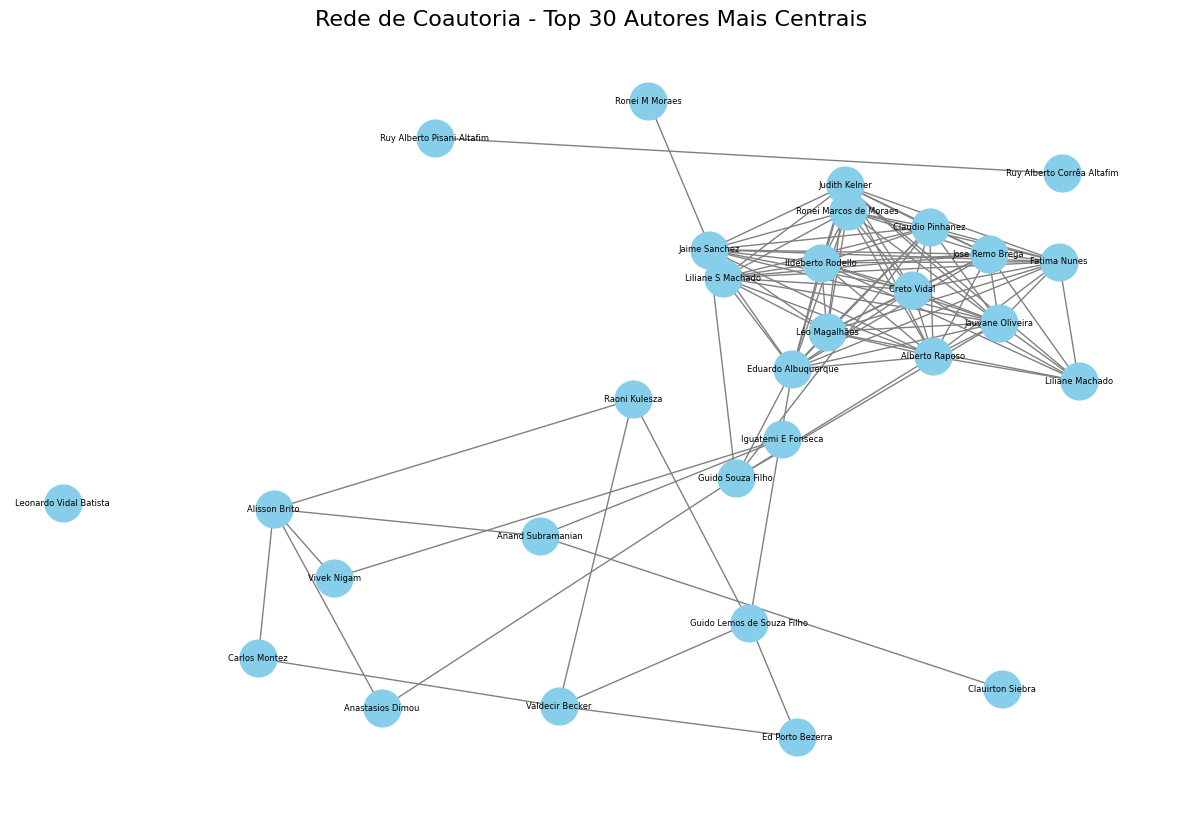

In [23]:
%run captura_dados/grafico_autores.py

# Análise da Rede de Coautorias

## Introdução

Neste projeto, foi realizada a análise de uma rede de coautorias entre pesquisadores. Para isso, utilizamos os dados de autores extraídos de arquivos CSV e construímos um **grafo de coautorias**, no qual:
- Cada **nó** representa um autor.
- Cada **aresta** indica uma **colaboração direta** (coautoria) entre dois autores.

A partir dessa estrutura de grafo, foram calculadas diferentes medidas de **centralidade** para identificar os autores mais relevantes na rede.

---

## Conceito de Grafo

Um **grafo** é uma estrutura matemática composta por **nós** (ou vértices) e **arestas** (ligações entre os nós).  
Neste contexto:
- **Nó:** Representa um autor individual.
- **Aresta:** Representa a colaboração (coautoria) entre dois autores.

Assim, **dois autores estão conectados** se eles publicaram um trabalho juntos. O grafo obtido é **não direcionado**, pois a relação de coautoria é mútua.

---

## Análise 1 - Como obter resposta?

Na primeira análise, procuramos as principais métricas de centralidade para o conjunto de autores. Para identificar quais pesquisadores se destacam em diferentes aspectos:

### 1. Centralidade de Grau
- Mede o **número de coautorias diretas** de um autor.
- Autores com grau mais alto são aqueles que colaboram com mais colegas.

### 2. Centralidade de Betweenness
- Mede o quanto um autor **atua como ponte** entre diferentes pares de autores na rede.
- Indica a importância de um autor para **manter a conectividade** da rede.

### 3. Centralidade de Closeness
- Mede a **eficiência de acesso** de um autor ao restante da rede.
- Quanto menor a distância média para os outros autores, maior sua centralidade.

---

## Análise 2 - Rede Completa (`autores_todos.csv`)

Realizando a análise para todos os autores disponíveis, os resultados foram:

### Top 5 - Centralidade de Grau
Autores com maior número de colaborações diretas:
- **Alisson Brito** (0.0777)
- **Liliane S Machado** (0.0596)
- **Ruy Alberto Corrêa Altafim** (0.0561)
- **Vivek Nigam** (0.0485)
- **Anand Subramanian** (0.0410)

### Top 5 - Centralidade de Betweenness
Autores que atuam como pontes estratégicas:
- **Alisson Brito** (0.1833)
- **Guido Lemos de Souza Filho** (0.1076)
- **Anand Subramanian** (0.1069)
- **Vivek Nigam** (0.1063)
- **Lucídio dos Anjos Formiga Cabral** (0.0863)

### Top 5 - Centralidade de Closeness
Autores mais "centralizados" na rede:
- **Alisson Brito** (0.2770)
- **Guido Lemos de Souza Filho** (0.2745)
- **Raoni Kulesza** (0.2594)
- **Lucídio dos Anjos Formiga Cabral** (0.2568)
- **Alexandre Nóbrega Duarte** (0.2552)

### Top 5 - Centralidade de Eigenvector
Autores conectados a outros autores influentes:
- **Alberto Raposo** (0.1439)
- **Jauvane Oliveira** (0.1424)
- **Eduardo Albuquerque** (0.1363)
- **Claudio Pinhanez** (0.1347)
- **Jaime Sanchez** (0.1347)

---

## Conclusões Gerais

- **Alisson Brito** se destacou em diversas métricas, indicando que é um autor **altamente colaborativo**, **estrategicamente central** e com forte influência na rede.
- **Guido Lemos de Souza Filho** e **Anand Subramanian** também ocupam posições estratégicas importantes na estrutura de coautorias.
- Autores como **Alberto Raposo** e **Jauvane Oliveira** aparecem como **figuras influentes**, bem conectadas a outros pesquisadores centrais.
- A rede de coautorias é **densa** e **bem conectada**, mas depende de alguns autores-chave para manter sua coesão e alcance.

## Resposta final para a pergunta 3:
- Como podemos ver no resultado da quarta saída de dados do script link.py 
"[50, 2, 6, 3, 2, 4281, 2, 81, 2, 2, 4, 3, 3, 8, 4, 6, 3, 3, 4, 4, 2, 10, 3, 6, 4, 13, 5, 3, 5, 6, 7, 6, 4, 11, 2, 7, 97, 5, 3, 2, 2, 2, 3, 11, 5, 29, 2, 8, 7, 4, 3, 2, 3, 2, 3, 5, 7, 4, 3, 3, 4, 3, 5, 79, 2, 20, 19, 7, 6, 2, 3, 3, 8, 3, 3, 4]"
Aqui tem o tamanho de cada componente conectada (grupo de autores conectados entre si).
Observações:
    Existem grupos muito pequenos (ex: 2, 3 autores) → são colaborações isoladas.
Existem grupos enormes:
    Um com 4281 autores — o núcleo da sua rede.
    Outros relevantes: 97 autores, 81 autores, 79 autores, 29 autores.
Com isso podemos abservar que existem grupos mais fechados e estão em maioria, porém não podemos deixar de pontuar números elevados como "4281", que apresentam uma componente conectada grande, mostrando que a rede está mais interconectada e os professores colaboram em uma rede ampla.

---

# Observações Metodológicas

- As medidas de centralidade foram calculadas utilizando a biblioteca **NetworkX** em Python.
- O algoritmo para centralidade de eigenvector foi executado com `max_iter=1000` para garantir a convergência em grafos maiores.
- Todos os valores foram normalizados para que as centralidades variem de 0 a 1.

---


## Conclusão

A análise revelou que:

- As áreas mais abordadas são sistemas digitais, realidade virtual, análise de problemas e segurança.
- A produção científica cresceu ao longo dos anos, com um pico em 2014, mas apresenta uma leve estabilização recente.
- As colaborações ocorrem em uma grande rede de colaboração, com grupos mais fechados, porém existem autores que tem uma ampla coautoria.

### Limitações:

- A coleta de dados depende da qualidade de indexação do Google Acadêmico, podendo faltar alguns artigos.
- Algumas datas estavam inconsistentes, exigindo tratamento manual ou automatizado cuidadoso.

### Trabalhos Futuros:

- Explorar técnicas de agrupamento para identificar áreas temáticas, monitorar o comportamento e as tendências a assuntos abordados.
- Analisar o impacto dos artigos para avaliar a relevância das publicações.